#### Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [2]:
import sqlite3

# Create a SQL connection to our SQLite database
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')

fires = pd.read_sql_query("SELECT * from fires", conn)

#### Verify if SQL query is stored in the dataframe

In [3]:
fires.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


#### First look into the the df and also information

In [4]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [5]:
# Columns selected
fire = fires[['SOURCE_SYSTEM_TYPE', 'FIRE_CODE', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
            'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR','CONT_DATE','CONT_DOY', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE']]

#### 17 columns that will bring relevant information to understand causes of fires across USA

In [6]:
fire.head()
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   SOURCE_SYSTEM_TYPE  object 
 1   FIRE_CODE           object 
 2   FIRE_NAME           object 
 3   FIRE_YEAR           int64  
 4   DISCOVERY_DATE      float64
 5   DISCOVERY_DOY       int64  
 6   DISCOVERY_TIME      object 
 7   STAT_CAUSE_CODE     float64
 8   STAT_CAUSE_DESCR    object 
 9   CONT_DATE           float64
 10  CONT_DOY            float64
 11  FIRE_SIZE           float64
 12  FIRE_SIZE_CLASS     object 
 13  LATITUDE            float64
 14  LONGITUDE           float64
 15  OWNER_DESCR         object 
 16  STATE               object 
dtypes: float64(7), int64(2), object(8)
memory usage: 243.9+ MB


#### Checking if there is any null value

In [7]:
fire.isna().sum()

SOURCE_SYSTEM_TYPE          0
FIRE_CODE             1555636
FIRE_NAME              957189
FIRE_YEAR                   0
DISCOVERY_DATE              0
DISCOVERY_DOY               0
DISCOVERY_TIME         882638
STAT_CAUSE_CODE             0
STAT_CAUSE_DESCR            0
CONT_DATE              891531
CONT_DOY               891531
FIRE_SIZE                   0
FIRE_SIZE_CLASS             0
LATITUDE                    0
LONGITUDE                   0
OWNER_DESCR                 0
STATE                       0
dtype: int64

#### We have 5 columns with null values

- FIRE_CODE: Code used within the interagency wildland fire community to track and compile cost information for emergency fire suppression (https://www.firecode.gov/).
- FIRE_NAME: Name of the incident, from the fire report (primary) or ICS-209 report (secondary)
- DISCOVERY_TIME: Time of day that the fire was discovered or confirmed to exist.
- CONT_DATE = Date on which the fire was declared contained or otherwise controlled (mm/dd/yyyy where mm=month, dd=day, and yyyy=year).
- CONT_DOY = Day of year on which the fire was declared contained or otherwise controlled.

For this first macro analysis, finally FIRE_CODE doesn't seem to be that relevant, neither FIRE_NAME, be we will keep into our dataframe.
DISCOVERY_TIME / CONT_DATE / CONT_DOY have almost half of the lignes empty, so for this analysis we will check date by periods of the year/months/days.

DISCOVERY_DATE / DISCOVERY_DOY --> Date type to be checked.

In [8]:
# checking distribution for DISCOVERY_TIME, more than half of lignes are empty

fire.DISCOVERY_TIME.isna().value_counts()

False    997827
True     882638
Name: DISCOVERY_TIME, dtype: int64

In [9]:
# In case we decide to trop DISCOVERY_TIME, FIRE_CODE, FIRE_NAME

# fire.drop(['DISCOVERY_TIME', 'FIRE_CODE', 'FIRE_NAME'], axis=1, inplace=True)

#### Replacing the name of DISCOVERY_DOY to DISCOVERY_DAY

In [10]:
fire.rename(columns={"DISCOVERY_DOY": "DISCOVERY_DAY"}, inplace=True)

C:\Users\paulo\AppData\Local\Temp/ipykernel_18512/4174281391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire.rename(columns={"DISCOVERY_DOY": "DISCOVERY_DAY"}, inplace=True)


In [11]:
fire.head()

,SOURCE_SYSTEM_TYPE,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DAY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE
0,FED,BJ8K,FOUNTAIN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,0.10,A,40.036944,-121.005833,USFS,CA
1,FED,AAC0,PIGEON,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,0.25,A,38.933056,-120.404444,USFS,CA
2,FED,A32W,SLACK,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA
3,FED,None,DEER,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.913333,USFS,CA
4,FED,None,STEVENOT,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.933056,USFS,CA


In [12]:
fire.FIRE_YEAR.value_counts().shape

(24,)

In [13]:
fire.FIRE_SIZE_CLASS.value_counts()

B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: FIRE_SIZE_CLASS, dtype: int64

In [14]:
fire.STAT_CAUSE_DESCR.value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

#### Checking date format

In [15]:
fire.DISCOVERY_DATE.head(2)

0    2453403.5
1    2453137.5
Name: DISCOVERY_DATE, dtype: float64

The DISCOVERY_DATE field is in Julian Date format. So we convert the same column to Gregorian dates (year - month - day). 

In [16]:
fire['DISCOVERY_DATE'] = pd.to_datetime(fire['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

C:\Users\paulo\AppData\Local\Temp/ipykernel_18512/2380913275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire['DISCOVERY_DATE'] = pd.to_datetime(fire['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')


In [17]:
 # Adding columns MONTH and DAY_OF_WEEK
    
fire['MONTH'] = pd.DatetimeIndex(fire['DISCOVERY_DATE']).month
fire['DAY_OF_WEEK'] = fire['DISCOVERY_DATE'].dt.day_name()

C:\Users\paulo\AppData\Local\Temp/ipykernel_18512/3692485487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire['MONTH'] = pd.DatetimeIndex(fire['DISCOVERY_DATE']).month
C:\Users\paulo\AppData\Local\Temp/ipykernel_18512/3692485487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire['DAY_OF_WEEK'] = fire['DISCOVERY_DATE'].dt.day_name()


#### Exploratory global Analysis

#### #part1
1) Distribution of fires from 1992 to 2015

2) Main reasons of fires from 1992 to 2015

3) Distributionof fire size Class

4) Distribution of sizes among the causes of fires.






###### 1) Distribution of fires from 1992 to 2015

Text(0.5, 1.0, 'Distribution of fires from 1992 to 2015')

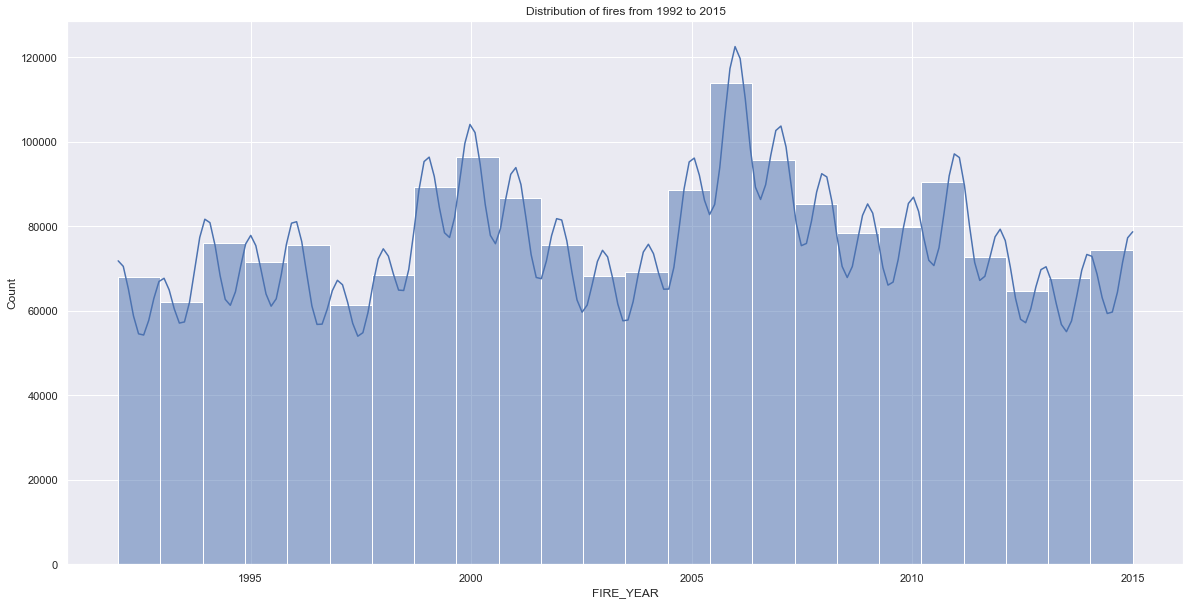

In [19]:
# Checking the distribution of fires from 1992 to 2015

plt.figure(figsize = (20, 10))
sns.histplot(fire['FIRE_YEAR'], bins=24, kde=True);
plt.title('Distribution of fires from 1992 to 2015')

The number of fires per year ran between 60,000 and 100,000 from 1992 to 2015.

From 1992 to 2006 it grew, not regularly, but we can see a pattern. Since the peak of 2006 it has decreased.

In [20]:
print('Numbers of case in 2006:', fire['FIRE_YEAR'].value_counts().max())

Numbers of case in 2006: 114004


###### 2) Checking the main reasons of fires from 1992 to 2015

Text(0.5, 1.0, 'Reasons of fires from 1992 to 2015')

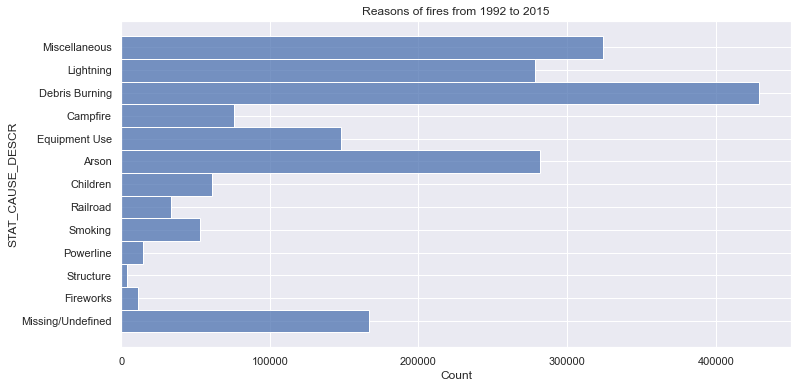

In [21]:
# Checking the main reasons of fires from 1992 to 2015

sns.set(rc={"figure.figsize":(12, 6)})
sns.histplot(y='STAT_CAUSE_DESCR', legend=True, data=fire);
plt.title('Reasons of fires from 1992 to 2015')

#plt.xticks(rotation=90); in case we use axis x for STAT_CAUSE_DESCR

Debris Burning is the biggest cause of fire. Debris burning means any fire spreading from any fire originally to clear land or burn rubbish/garbage.

Followed by Miscellaneous, Arson (criminal fire) and Lightning fire.

###### 3) Checking the distributionof fire size Class

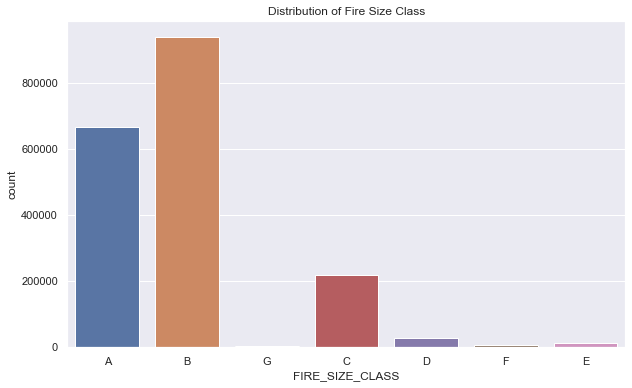

In [23]:
# Checking the distributionof fire size Class

sns.set(rc={"figure.figsize":(10, 6)})
sns.countplot(x='FIRE_SIZE_CLASS', data=fire,  orient='v');
plt.title('Distribution of Fire Size Class');

1 acre = 4046 m2, which is 60% of a football pitch or equivalent to 16 tenis court

From the plot we see that fires are most likely to happen in small surfaces (A) or in less then 10 acres (B)

A=greater than 0 but less than or equal to 0.25 acres

B=0.26-9.9 acres

C=10.0-99.9 acres

D=100-299 acres

E=300 to 999 acres

F=1000 to 4999 acres

G=5000+ acres



###### 4) How is the distribution of sizes among the causes of fires?

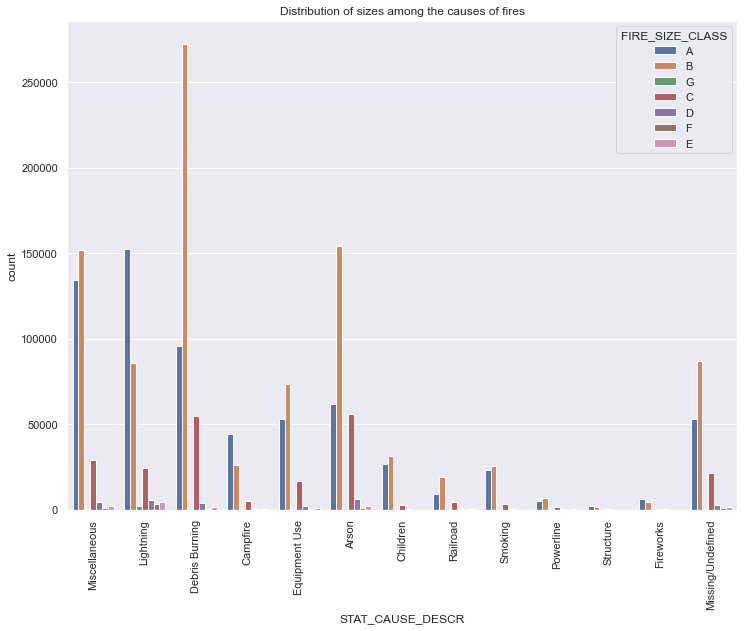

In [24]:
# How is the distribution of sizes among the causes of fires? en utilisant countplot

sns.set(rc={"figure.figsize":(12, 9)})
sns.countplot(x='STAT_CAUSE_DESCR', hue='FIRE_SIZE_CLASS', data=fire);
plt.title('Distribution of sizes among the causes of fires')
plt.xticks(rotation=90);

Here we see the distribution o size among the causes. One interesting insight can be the average size by cause.

#### Exploratory global Analysis

#### #part2

1) What are the states with the most fires? Is it related to the size/climate ?

2) Is there any relation between the day of the week and cause of fire?

3) ...